In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [2]:
velocidade = [10, 20, 30, 40, 50, 60, 70, 80]
viscosidade = [0.121, 0.139, 0.153, 0.159, 0.172, 0.172, 0.183, 0.185]
theta = math.radians(0.5)  # converte graus para radianos

var_veloc = pd.Series(velocidade)  #
var_visco = pd.Series(viscosidade)
var_freq = pd.Series(velocidade)
var_freq = var_freq * (2 * math.pi) / 60  # converte a frequência em hz para velocidade angular rad/s
var_visco = var_visco * 1000  # viscosidade a 10³
angular = var_freq / theta # taxa de deformação du/dy

# dicionário de dados
bloco_de_dados = {'Velocidade (RPM)': var_veloc,
                  'Vel. Angular (rad/s)': var_freq,
                  'Taxa de Deformação (ω/θ)': angular,
                  'Viscosidade (N.s/m²*10³)': var_visco,
                  'Deformação log10(ω/θ)':np.log10(angular),
                  'Viscosidade log10(u)':np.log10(var_visco)
                  }

# formatação com pandas dataframe
quadro_info = pd.DataFrame(bloco_de_dados)
quadro_info

,Velocidade (RPM),Vel. Angular (rad/s),Taxa de Deformação (ω/θ),Viscosidade (N.s/m²*10³),Deformação log10(ω/θ),Viscosidade log10(u)
0,10,1.047198,120.0,121.0,2.079181,2.082785
1,20,2.094395,240.0,139.0,2.380211,2.143015
2,30,3.141593,360.0,153.0,2.556303,2.184691
3,40,4.188790,480.0,159.0,2.681241,2.201397
4,50,5.235988,600.0,172.0,2.778151,2.235528
5,60,6.283185,720.0,172.0,2.857332,2.235528
6,70,7.330383,840.0,183.0,2.924279,2.262451
7,80,8.377580,960.0,185.0,2.982271,2.267172


In [3]:

xdic = {'X':np.log10(angular)}
ydic = {'Y':np.log10(var_visco)}

X = pd.DataFrame.from_dict(xdic)
Y = pd.DataFrame.from_dict(ydic)

x_SEQ = np.linspace(X.min(),X.max(),300).reshape(-1,1)

value = 2 # grau do polinômio

polynomial_regression = make_pipeline(PolynomialFeatures(value),LinearRegression())
polynomial_regression.fit(X,Y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

C:\Users\alana\anaconda3\envs\mathplots\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


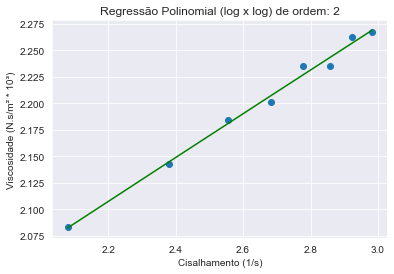

In [4]:
plt.figure()
plt.scatter(X,Y)
plt.plot(x_SEQ, polynomial_regression.predict(x_SEQ),color='Green')
plt.title('Regressão Polinomial (log x log) de ordem: '+str(value))
plt.grid(True)
plt.xlabel("Cisalhamento (1/s)")
plt.ylabel("Viscosidade (N.s/m² * 10³)")
plt.show()

In [7]:
datas_regression = {
    'X': np.log10(angular),
    'Y': np.log10(var_visco),
    'XY': np.log10(angular) * np.log10(var_visco),
    'X2': np.log10(angular) * np.log10(angular)
}
datas_regression = pd.DataFrame(datas_regression)

A = (len(angular) * sum(datas_regression.XY) - sum(datas_regression.Y) * sum(datas_regression.X))/(len(angular) * sum(datas_regression.X2) - (sum(datas_regression.X)**2))
# A é o coeficiente n-1, onde n vai ser 1.20676

B = (sum(datas_regression.X)*sum(datas_regression.XY) - sum(datas_regression.Y)*sum(datas_regression.X2))/((sum(datas_regression.X)**2) - len(angular) * sum(datas_regression.X2))
# B é o log10(k) * 10^3, logo k tem que ser 0.0449

x = sm.add_constant(datas_regression.X)

resultados = sm.OLS(datas_regression.Y, x).fit()
resultados.summary()

C:\Users\alana\anaconda3\envs\mathplots\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     788.7
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           1.35e-07
Time:                        17:26:59   Log-Likelihood:                 30.794
No. Observations:                   8   AIC:                            -57.59
Df Residuals:                       6   BIC:                            -57.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6526      0.020     84.065      0.000       1.605       1.701
X              0.2068      0.007     28.085      0.000       0.189       0.225
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   3.793
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.386
Skew:                           0.093   Prob(JB):                        0.824
Kurtosis:                       1.940   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
n = A + 1
k = (10**B)/1000

print('os coeficientes k:{:.4f} e n:{:.4f}'.format(k,n))

os coeficientes k:0.0449 e n:1.2068
